## Author : Bibek Shah Shankhar

###  Graduate Rotational Internship Program 
## The Sparks Foundation

## Task 1: Prediction Using Supervised ML

In this regression task I am trying to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [143]:
## Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## we are setting seaborn as our default themme
sns.set()
##This code ignores any warning shown in the notebook
import warnings
warnings.filterwarnings("ignore")

In [144]:
## Reading the data from github raw link

url = "http://bit.ly/w-data"

data = pd.read_csv(url)
print('Data imported Successfully')
data.head()

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As we can see the data is imported from url successfully and first five rows from the dataframe is shown.

Now, lets see the shape of our dataset

In [145]:
data.shape

(25, 2)

We can see that  in our dataset there are 25 rows and 2 columns

In [146]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above summary table we can see that the student studied of minimum of 1.1 hours and maximum of 9.2 hours .Also the average score is about 51 whereas minimum and maximum score are 25 and 95 respectively 

## Data Visualization

Now let's plot our data points using the scatter plot and see if we can manually find any relationship between the data. We can create the plot with the following script

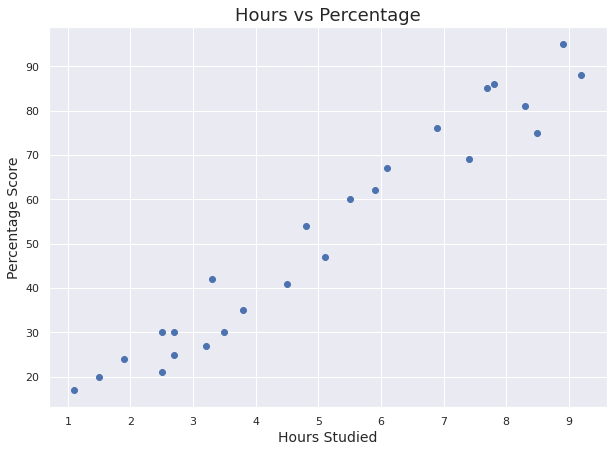

In [147]:
# Plotting the distribution of scores
fig = plt.figure(figsize=(10,7))
plt.scatter(data = data,x='Hours', y='Scores')  
plt.title('Hours vs Percentage', fontsize = 18)
plt.xlabel('Hours Studied', fontsize = 14)  
plt.ylabel('Percentage Score', fontsize = 14)  
plt.show()

From the scatter plot above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:xlabel='Hours', ylabel='Count'>

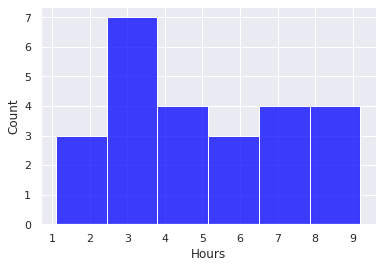

In [148]:
sns.histplot(data['Hours'], color = 'blue')

<AxesSubplot:xlabel='Scores', ylabel='Count'>

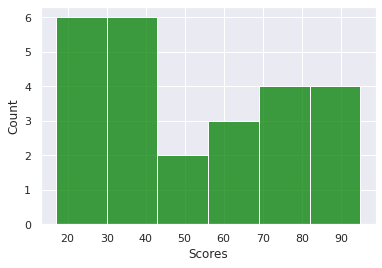

In [149]:
sns.histplot(data['Scores'], color = 'green')

## Data Preprocessing
This step involved division of data into "attributes" (inputs) and "labels" (outputs).



In [150]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and label, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [151]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Model

In [152]:
# Using SKlearn library for machine learning
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

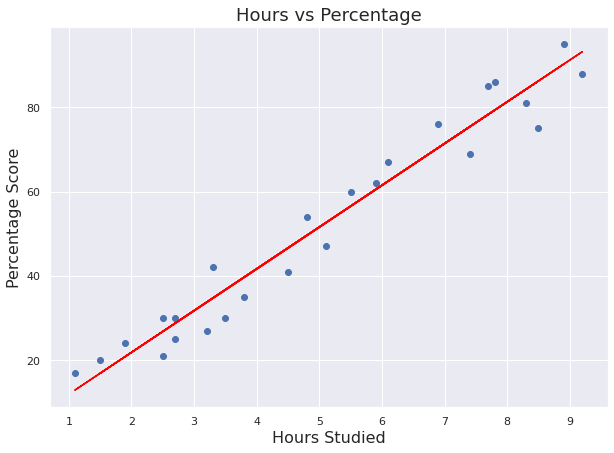

In [161]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
fig = plt.figure(figsize=(10,7))
plt.scatter(data = data,x='Hours', y='Scores')  
plt.title('Hours vs Percentage', fontsize = 18)
plt.xlabel('Hours Studied', fontsize = 16)  
plt.ylabel('Percentage Score', fontsize = 16)  
plt.plot(X, line, color = 'red');
plt.show()

## Making Predictions
Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [154]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual result to the Predicted Model result


In [155]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [156]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


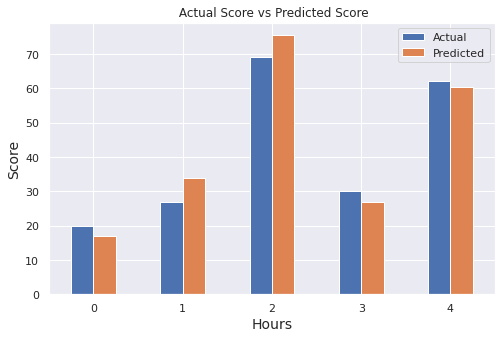

In [157]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(8,5))
plt.title(' Actual Score vs Predicted Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Hours', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [158]:
#Testing with our data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours Studied = 9.25
Predicted Score = 93.69173248737538


In [159]:
# Testing with our data 2
hours = [2,7,4,1.1,2.9,4,8,0]
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours Studied = [2, 7, 4, 1.1, 2.9, 4, 8, 0]
Predicted Score = [21.839473   71.39275541 41.66078596 12.91988217 30.75906384 41.66078596
 81.30341189  2.01816004]


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [160]:
from sklearn import metrics  
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 4.183859899002975
Mean Squared Error(MSE): 21.5987693072174
Root Mean Squared Error(RMSE): 4.6474476121003665
R-2: 0.9454906892105356


## Conclusion

### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

# Thank You